# CADUTA LIBERA

$h = \frac{1}{2}gt^2 \Rightarrow B = \frac{1}{2}g \Rightarrow g = 2B$


linearità A + BX
    
A: 0.0009135356871497368 
B: 4.94708127579513
sigmaA: 0.002161196179698952
sigmaB: 0.024408089771415595

sigmaY: 0.002    
chiquadro ridotto: 2.77
df: 11
pvalue: 99.3%


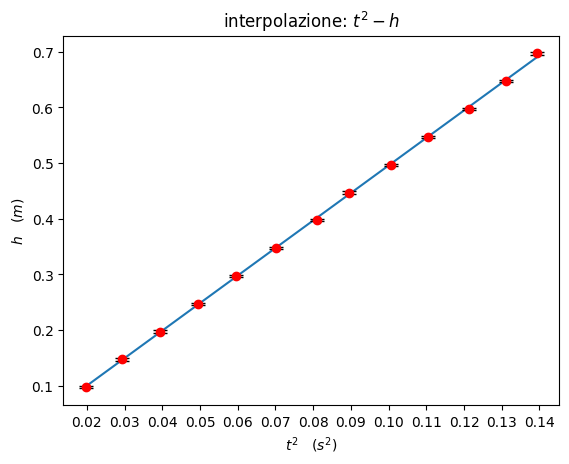

g:  9.8942 ± 0.0488 


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata, final_val
import os

FILE = os.path.abspath('') + '/../CSV/' + 'caduta_libera.csv'
fr = pd.read_csv(FILE)

h = np.array([10,15,20,25,30,35,40,45,50,55,60,65,70])

t = []
err_t = []
for i in h:
    colonna = np.array(fr[str(i)])
    t.append(np.mean(colonna))
    err_t.append(np.std(colonna)/np.sqrt(len(colonna)))

t = np.array(t)/1000 # s
err_t = np.array(err_t)/1000 # s

h = h*0.01 + 0.004 + 0.009 - 0.016 # correzioni pedana TODO: verificare correzioni pedana
sigmaH = 0.002 # m incertezza relativa allo strumento di misura

r = RettaInterpolata(t**2,h,sigmaH)
print(r)
plt.title("interpolazione: $t^{2} - h$")
plt.plot(r.x_best,r.y_best)
plt.errorbar(t**2,h,fmt='o',yerr=r.sigmaY,color="red",ecolor="black",capsize=5)
plt.xticks(np.round(t**2,2))
plt.ylabel('$h\quad(m)$')
plt.xlabel('$t^{2}\quad(s^2)$')
plt.show()


# STIMA DI G

g = 2*r.B
sigmag = 2*r.sigmaB

print('g: ',final_val(g,sigmag,decimals=4))